<a href="https://colab.research.google.com/github/LuckyLuke147/age_recognition/blob/master/Zdj%C4%99cia_RTG_d%C5%82oni_%7C_Sieci_konwolucyjne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import bibliotek**

In [269]:
!sudo pip3 install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [277]:
import os
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [278]:
PATH = '/content/drive/MyDrive/Praca_mgr./dataset/'
SIZE = (224, 224) # EfficientNet

## **Sekcja 2**

In [381]:
class CustomImageDataGenerator():
  def __init__(
      self,
      batch_size: int = 2,#32,
      target_shape: tuple = SIZE,
      img_path: str = None,
      csv_file: str = None,
      **kwargs
  ):

    self.batch_size = batch_size
    self.target_shape = target_shape
    self.img_path = img_path

    if img_path is not None:
      self.indexes = np.array([[Index, Data] for Index, Data in 
                               enumerate(
                                   sorted(
                                       os.listdir(self.img_path),
                                       key=lambda x: int(x[:-4])
                                       )
                                   )
                               ]
                              )

    if csv_file is not None:
      self.csv_file = pd.read_csv(csv_file)

    self.augmentation = ImageDataGenerator(height_shift_range=0.5, 
                                           horizontal_flip=True, 
                                           width_shift_range=[-200,200],
                                           rotation_range=90,
                                           brightness_range=[0.2,1.0],
                                           zoom_range=[0.5,1.0])

  def __get_age(self, image):
    for img_name, age in self.csv_file[['id', 'boneage']].values:
      if img_name == int(image[:-4]):
        return age

  def __get_gender(self, image):
    for img_name, male in self.csv_file[['id', 'male']].values:
      if img_name == int(image[:-4]):
        return 1 if male is True else 0


  def next(self, index):
    images = []
    genders = []
    ages = []

    indexes = self.indexes[index * self.batch_size : (index + 1) * self.batch_size]
    
    for i in indexes:

      image_name = i[1]
      age = self.__get_age(image_name)
      gender = self.__get_gender(image_name)

      image_directory = self.img_path + image_name

      image = load_img(
          image_directory, 
          color_mode='rgb', 
          target_size=self.target_shape,
          interpolation='nearest')
      
      image_array = img_to_array(image)

      # expand dimension to one sample
      samples = expand_dims(image_array, 0)
      
      # create image data augmentation generator
      datagen = self.augmentation

      # prepare iterator
      it = datagen.flow(samples, batch_size=self.batch_size)
      batch = it.next()
      
      # convert to unsigned integers for viewing
      image = batch[0].astype('uint8')

      images.append(image)
      genders.append(gender)
      ages.append(age)

    return [np.array(images), np.array(genders)], np.array(ages) 

In [384]:
sampleObject = CustomImageDataGenerator(
    img_path = PATH + 'boneage-training-dataset/',
    csv_file = PATH + 'boneage-training-dataset.csv'
)

example = sampleObject.next(0)

fetched_image = example[0][0]
fetched_genders = example[0][1]
fetched_ages = example[1]

print(example)

print(fetched_image)
print(fetched_genders)
print(fetched_ages)

print(fetched_image.shape)
print(fetched_genders.shape)
print(fetched_ages.shape)

([array([[[[150, 150, 150],
         [164, 164, 164],
         [179, 179, 179],
         ...,
         [192, 192, 192],
         [200, 200, 200],
         [207, 207, 207]],

        [[131, 131, 131],
         [119, 119, 119],
         [130, 130, 130],
         ...,
         [172, 172, 172],
         [176, 176, 176],
         [182, 182, 182]],

        [[174, 174, 174],
         [161, 161, 161],
         [149, 149, 149],
         ...,
         [184, 184, 184],
         [180, 180, 180],
         [177, 177, 177]],

        ...,

        [[159, 159, 159],
         [151, 151, 151],
         [145, 145, 145],
         ...,
         [167, 167, 167],
         [150, 150, 150],
         [135, 135, 135]],

        [[125, 125, 125],
         [136, 136, 136],
         [147, 147, 147],
         ...,
         [137, 137, 137],
         [154, 154, 154],
         [173, 173, 173]],

        [[ 98,  98,  98],
         [ 99,  99,  99],
         [111, 111, 111],
         ...,
         [ 76,  76,  76],
      

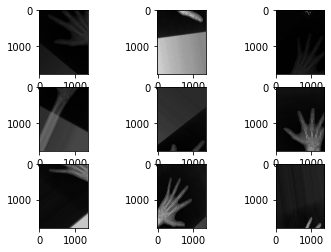

In [368]:
# EXAMPLE 
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

image_path = PATH + 'boneage-training-dataset/15610.png'

img = load_img(image_path)
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(height_shift_range=0.5, 
                             horizontal_flip=True, 
                             width_shift_range=[-200,200],
                             rotation_range=90,
                             brightness_range=[0.2,1.0],
                             zoom_range=[0.5,1.0])
# prepare iterator
it = datagen.flow(samples, batch_size=32)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()